In [1]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
iris = load_iris()
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
df.drop(['sepal length (cm)', 'sepal width (cm)'], axis = 'columns', inplace = True)
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [5]:
scaler = MinMaxScaler()

In [6]:
scaler.fit(df[['petal length (cm)']])
df['petal length (cm)'] = scaler.transform(df[['petal length (cm)']])

scaler.fit(df[['petal width (cm)']])
df['petal width (cm)'] = scaler.transform(df[['petal width (cm)']])

df.head()

,petal length (cm),petal width (cm)
0,0.067797,0.041667
1,0.067797,0.041667
2,0.050847,0.041667
3,0.084746,0.041667
4,0.067797,0.041667


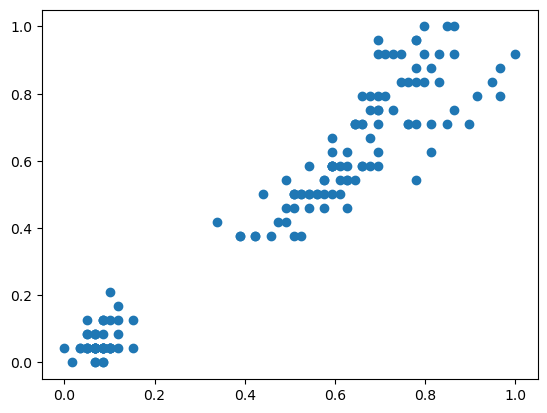

In [7]:
plt.scatter(df['petal length (cm)'], df['petal width (cm)'])

## Predicting for the best value of k
We will take range of k from 1 to 11 and select the value of k from where the sse decrement rate becomes very less

In [8]:
k_range = range(1, 12)
sse = []

for k in k_range:
    model = KMeans(n_clusters = k, n_init = 'auto')
    model.fit(df)
    sse.append(model.inertia_)

In [9]:
sse

[28.368353219727194,
 5.176463590044367,
 1.7018746881920965,
 1.1826653136050636,
 0.853861735391224,
 0.6883515870198605,
 0.5973915964079797,
 0.49774063859426165,
 0.46446858769072713,
 0.416061419076896,
 0.3278891074474838]

Text(0, 0.5, 'sse')

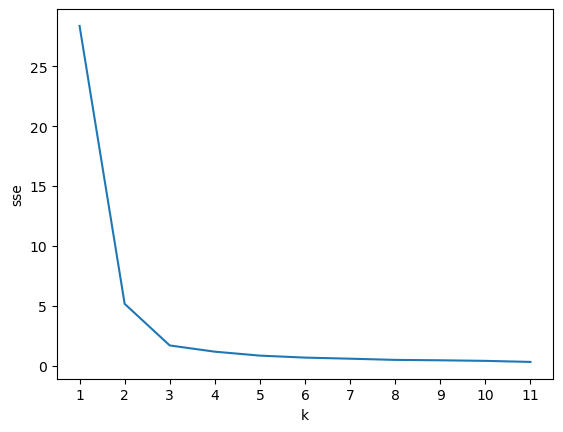

In [10]:
plt.plot(k_range, sse)
plt.xticks(k_range)
plt.xlabel('k')
plt.ylabel('sse')

## Choosing k value
From the above plot it can be clearly stated that k should be 3

In [11]:
k_means = KMeans(n_clusters = 3, n_init = 'auto')
cluster = k_means.fit_predict(df)
cluster

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [12]:
df['predicted_cluster'] = cluster
df.head()

,petal length (cm),petal width (cm),predicted_cluster
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1


In [13]:
df0 = df[df['predicted_cluster'] == 0]
df1 = df[df['predicted_cluster'] == 1]
df2 = df[df['predicted_cluster'] == 2]

centroids = k_means.cluster_centers_

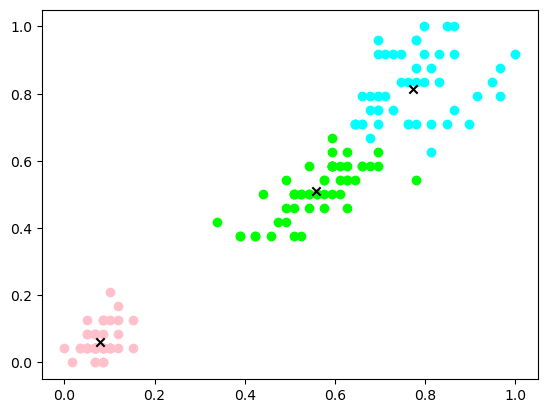

In [14]:
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color = 'lime')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color = 'pink')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color = 'cyan')
plt.scatter(centroids[:, 0], centroids[:, 1], marker = 'x', color = 'black')